In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [3]:
%load_ext autoreload
%autoreload 2

In [39]:
from numpyGillespie import Gillespie as gil

In [40]:
# Define some testing values.
# The list of initial values of species to will track
X = [1000,]

# The list of rate constants
C = [0.5,]

# the change in X that results from the change from rate constant c
# in this case X = X - 1
# since one X decays and we do not track the decay product
change = [lambda u: [u[0] - 1.0,]]
# Where u[0] takes the first element from the X list

# and the H value is the number of distinct R, molecular reactant
# combinations available in the state
# In this case one for each
perm = [lambda u: u[0],]

In [41]:
out = gil(X, C, change, perm, max_sim_rxn=1000).simulate()

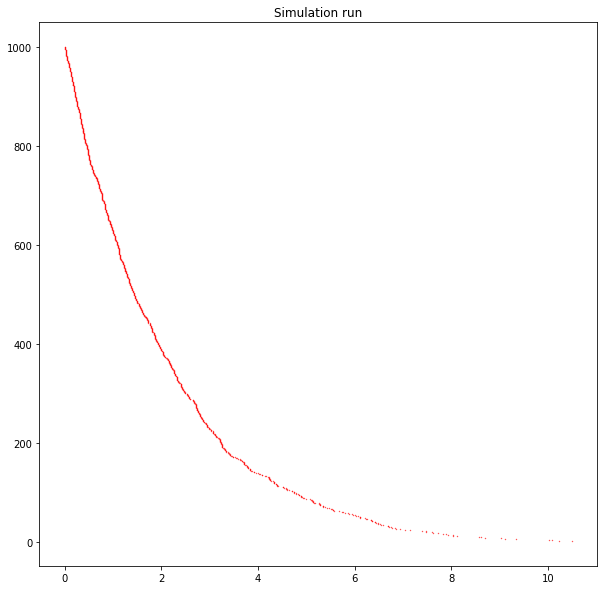

In [42]:
plt.figure(1, figsize=(10,10))
plt.scatter(out[0], [y[0] for y in out[1]], marker=".", s=.5, alpha=0.9, color = 'r')
plt.title("Simulation run")
plt.show()

In [43]:
exp_runs = list()

for i in tqdm(range(100), desc="Running simulations"):
    exp_runs.append(gil(X, C, change, perm, max_sim_rxn=1000).simulate())

Running simulations: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.50it/s]


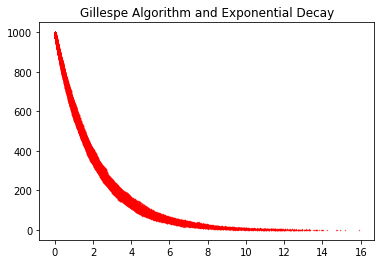

In [44]:
for run in exp_runs:
    # unzip the data
    r = zip(*run)
    t, x = zip(*r)
    plt.scatter(run[0], [y[0] for y in run[1]], marker=".", s=.5, alpha=0.9, color = 'r')
    
    
plt.title('Gillespe Algorithm and Exponential Decay')
plt.show()

## Complete Output

In [45]:
# Load into pandas
import pandas as pd

In [48]:
from numpyGillespie import CompleteGillespie as cg
from numpyGillespie import pandas_output

In [49]:
complete_out = cg(X, C, change, perm, max_sim_rxn=1000).simulate()

In [55]:
data = pandas_output(complete_out)

In [52]:
XX = [3000]

CC = [5., 0.005]

XC = [lambda j: [j[0] + 1],
      lambda j: [j[0] - 2]]

HH = [lambda k: k[0],
      lambda k: k[0] * (k[0] -1) / 2.]

In [59]:
comp_out_2 = cg(XX, CC, XC, HH, max_sim_rxn=100000).simulate()

In [60]:
data2 = pandas_output(comp_out_2)
print(data2.keys())

Index(['time', 'mu', 'species_0', 'av_0', 'av_1'], dtype='object')


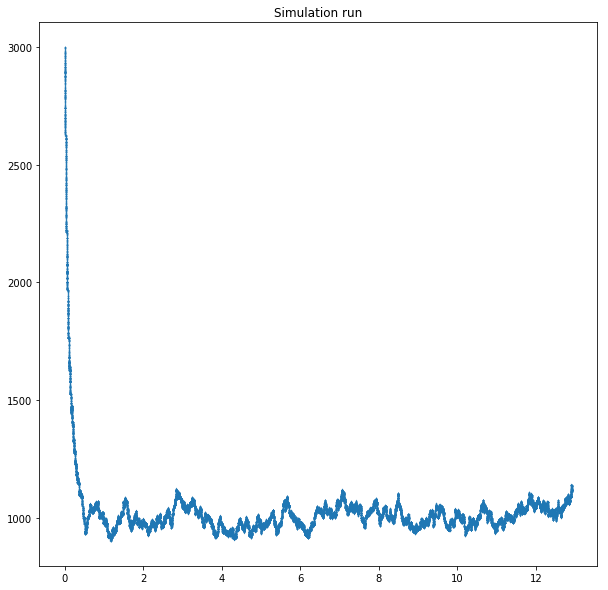

In [61]:
plt.figure(1, figsize=(10,10))
plt.scatter(data2['time'], data2['species_0'], marker=".", s=.5, alpha=0.9)

plt.title("Simulation run")
plt.show()

In [47]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [46]:
from bokeh.palettes import brewer

In [62]:
output_notebook()

Loading BokehJS ...

In [65]:
p = figure(output_backend="webgl")
p.scatter(
    'time',
    'species_0',
    source=data2,
    alpha=0.1,
    size=0.3)
show(p)